# Analysis

## 1. Prepare Data

### 1.1 Load Data

In [3028]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3029]:
# Read raw dara
scopus_df = pd.read_csv("../Screening/scopus.csv")
wos_df = pd.read_csv("../Screening/WoS.csv")
ieee_df = pd.read_csv("../Screening/IEEE.csv")
proquest_df = pd.read_csv("../Screening/ProQuest.csv")

In [3030]:
# Read screening data
initial_search_df = pd.read_csv("../Screening/initial_search.csv")
removed_duplicates_df = pd.read_csv("../Screening/removed_duplicates.csv")
after_s1_df = pd.read_csv("../Screening/after_s1.csv")

In [3031]:
# Read analysis data
notion_df = pd.read_csv("notion.csv")
author_df = pd.read_csv("author_database.csv")
notion_df

,ID,Title,Reference,Reviewer,Include?,File,Input enhancement?,Prediction engine?,Multi-agent?,News Sentiment,...,Corporate Communication Sentiment,Input Enhancement Beyond Sentiment,Type Prediction Engine,Survey?,Instrument,DOI,Link,Results,Model(s),Financial Instrument
0,10.18653/v1/2023.emnlp-industry.69,Harnessing LLMs for Temporal Data - A Study on...,\textcite{yu_chen_lu_2023},Olav,Yes,Literature%20Database/2023.emnlp-industry.69.pdf,❌,✔️,❌,NaN,...,NaN,NaN,"Financial Numerical Input, Financial Text Inpu...",❌,Stocks,10.18653/v1/2023.emnlp-industry.69,https://doi.org/10.18653/v1/2023.emnlp-industr...,Yu et al. (2023) investigated stock return pre...,"GPT-4, Open LLaMA 13B",Stock
1,10.1007/s43546-021-00106-0,Construction of a news article evaluation mode...,NaN,Sondre,Tja,Literature%20Database/s43546-021-00106-0.pdf,✔️,❌,❌,NaN,...,NaN,NaN,NaN,❌,Stocks,10.1007/s43546-021-00106-0,https://doi.org/10.1007/s43546-021-00106-0,The study by Nish et al. (2021) developed a de...,GPT-2,Stock
2,10.1007/978-3-030-58790-1_7,News Articles Evaluation Analysis in Automotiv...,NaN,Sondre,Tja,Literature%20Database/978-3-030-58790-1.pdf,✔️,❌,❌,NaN,...,NaN,NaN,NaN,❌,Stocks,10.1007/978-3-030-58790-1_7,https://doi.org/10.1007/978-3-030-58790-1_7,"Nishi, Suge, and Takahashi (2020) develop an L...",GPT-2,Stock
3,10.1109/ICCA62237.2024.10927897,Assessing the Correlation Between News Sentime...,\textcite{alnahyan_shuhaiber_2024},Sondre,Yes,Literature%20Database/Assessing_the_Correlatio...,✔️,❌,❌,True,...,NaN,NaN,NaN,❌,Stocks,10.1109/icca62237.2024.10927897,https://doi.org/10.1109/icca62237.2024.10927897,Al Nahyan and Shuhaiber (2024) examine the rel...,Open AI,Stock
4,2-s2.0-85195171155,Modal-adaptive Knowledge-enhanced Graph-based ...,NaN,Olav,Tja,Literature%20Database/Modal-adaptive_Knowledge...,✔️,✔️,❌,NaN,...,NaN,NaN,NaN,❌,Multiple assets,NaN,https://doi.org/10.48550/arXiv.2403.16055,Tja usikker. \nBERT/ andre Encoders brukes for...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,10.1016/j.dss.2024.114362,Revisiting time-varying dynamics in stock mark...,NaN,Sander,Tja,Literature%20Database/1-s2.0-S0167923624001957...,❌,❌,❌,NaN,...,NaN,NaN,NaN,❌,Stock,10.1016/j.dss.2024.114362,https://doi.org/10.1016/j.dss.2024.114362,BERT,NaN,NaN
135,10.54364/AAIML.2025.52216,Assessing Lag-Llama in Probabilistic Time Seri...,\textcite{nasution_et_al_2025},Sondre,Yes,Literature%20Database/111752216.pdf,❌,✔️,❌,NaN,...,NaN,NaN,Financial Numerical Input,❌,Stock,10.54364/aaiml.2025.52216,https://doi.org/10.54364/aaiml.2025.52216,Nasution et al. (2025) evaluates the LLM-based...,Lag-LLaMA,Stock
136,10.1111/exsy.70018,"Generative AI for Finance: Applications, Case ...",NaN,Sander,No,NaN,❌,❌,❌,NaN,...,NaN,NaN,NaN,✔️,?,10.1111/exsy.70018,https://doi.org/10.1111/exsy.70018,Marked as survey but only small parts of the p...,NaN,NaN
137,10.1145/3677052.3698684,Transformers and attention-based networks in q...,NaN,Sondre,No,Literature%20Database/Transformers_and_attenti...,❌,❌,❌,NaN,...,NaN,NaN,NaN,✔️,NaN,10.1145/3677052.3698684,https://doi.org/10.1145/3677052.3698684,Coelho e Silva et al. (2024) provides a compre...,NaN,NaN


### 1.2 Clean Data

In [3032]:
# Clean Wos dataframe
clean_wos_df = wos_df.set_index("UT")
clean_wos_df["Origin"] = "WOS"
clean_wos_df.index.name = "ID"

In [3033]:
# Clean Scopus dataframe
clean_scopus_df = scopus_df.copy()
clean_scopus_df["ID"] = np.where(pd.isna(clean_scopus_df["DOI"]), scopus_df["EID"], clean_scopus_df["DOI"])
clean_scopus_df = clean_scopus_df.set_index("ID")
clean_scopus_df["Origin"] = "SCOPUS"
clean_scopus_df.index.name = "ID"

In [3034]:
# Clean ieee dataframe
clean_ieee_df = ieee_df.copy()
clean_ieee_df["Keywords"] = ieee_df["IEEE Terms"].str.cat(ieee_df["Author Keywords"], sep=";")
clean_ieee_df["ID"] = ieee_df["PDF Link"]
clean_ieee_df = clean_ieee_df.set_index("ID")
clean_ieee_df["Origin"] = "IEEE"
clean_ieee_df.index.name = "ID"

In [3035]:
# Clean ProQuest dataframe
clean_proquest_df = proquest_df.copy()
clean_proquest_df = clean_proquest_df.rename(columns={
    "digitalObjectIdentifier": "DOI",
    "issn": "ISSN",
    "elecISSN": "EISSN"
})

clean_proquest_df["ID"] = np.where(
    pd.notna(clean_proquest_df["DOI"]), clean_proquest_df["DOI"],
    np.where(
        pd.notna(clean_proquest_df["ISSN"]), clean_proquest_df["ISSN"],
        np.where(
            pd.notna(clean_proquest_df["EISSN"]), clean_proquest_df["EISSN"],
            clean_proquest_df["StoreId"]
        )
    )
)

clean_proquest_df= clean_proquest_df.drop(columns=["ISSN", "EISSN", "StoreId"])
clean_proquest_df = clean_proquest_df.set_index("ID")
clean_proquest_df["Origin"] = "Proquest"
clean_proquest_df.index.name = "ID"

In [3036]:
# Rename colums to consistent format in all dataframes when equal information

# WoS dataframe renaming
clean_wos_df.rename(columns={"DOI":"?????"}, inplace=True)
clean_wos_df.rename(columns={
    'ID': '...',
    'AF': 'Authors',
    'TI': 'Title',
    'SO': 'Source Title',
    'PY': 'Publication Year',
    'DT': 'Publication Type',
    'DE': 'Keywords',
    'LA': 'Language',
    'DI': 'DOI',
    'AB': 'Abstract',
    'Z9': 'Cited by',
    'C1': 'Full author information'
}, inplace=True)


# Scopus dataframe renaming
clean_scopus_df.rename(columns={
    'ID': 'ID',
    'Authors': 'Authors',
    'Title': 'Title',
    'Source title': 'Source Title',
    'Year': 'Publication Year',
    'Author Keywords': 'Keywords',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
    'Cited by': 'Cited by',
}, inplace=True)

# IEEE dataframe renaming
clean_ieee_df.rename(columns={
    'ID': 'ID',
    'Authors': 'Authors',
    'Document Title': 'Title',
    'Publication Title': 'Source Title',
    'Publication Year': 'Publication Year',
    'Author Keywords': 'Author Keywords',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
    'Cited by': 'Cited by',
}, inplace=True)

# ProQuest dataframe renaming
clean_proquest_df.rename(columns={
    'ID': 'ID',
    'Author': 'Authors',
    'Title': 'Title',
    'Publication': 'Source Title',
    'PubDate': 'Publication Year',
    'DOI': 'DOI',
    'Abstract': 'Abstract',
}, inplace=True)

### 1.3 Merge Data

In [3037]:
all_columns = set(clean_wos_df.columns).union(clean_scopus_df.columns, clean_ieee_df.columns, clean_proquest_df.columns)
clean_wos_df = clean_wos_df.reindex(columns=all_columns)
clean_scopus_df = clean_scopus_df.reindex(columns=all_columns)
clean_ieee_df = clean_ieee_df.reindex(columns=all_columns)
clean_proquest_df = clean_proquest_df.reindex(columns=all_columns)
clean_df = pd.concat([clean_scopus_df, clean_wos_df, clean_ieee_df, clean_proquest_df]).reset_index()
clean_df

,ID,Volume,BF,DocumentURL,PI,FP,DA,Cited by,Publication Year,URL,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1007/978-981-96-6291-3_3,2380 CCIS,NaN,NaN,NaN,NaN,NaN,0.0,2026.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10.1016/j.eswa.2025.128676,295,NaN,NaN,NaN,NaN,NaN,1.0,2026.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10.1186/s40854-025-00789-6,11,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10.1016/j.frl.2025.108489,86,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10.1007/s12525-025-00815-6,35,NaN,NaN,NaN,NaN,NaN,0.0,2025.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,10.1162/NECO_a_00007,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,N3 11002 Computational & theoretical neurosci...,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
598,10.1162/NECO_a_00007,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NLM,NaN,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
599,0899-7667,NaN,NaN,https://www.proquest.com/scholarly-journals/ba...,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Sep 2010,NaN,NaN,NaN,Sep 2010,NaN
600,10.1108/02686900610705037,NaN,NaN,https://www.proquest.com/scholarly-journals/st...,NaN,NaN,NaN,NaN,NaN,http://www.emeraldinsight.com/Insight/viewCon...,...,NaN,NaN,"B7 Management, Training, Regulations, Marketi...",NaN,NaN,NaN,NaN,NaN,2006,NaN


### 1.4 Remove Duplicates

In [3038]:
# Normalize DOI
clean_df["DOI"] = clean_df["DOI"].str.lower()
clean_df["DOI"] = clean_df["DOI"].str.replace("https://doi.org/", "")

# Separate NaN DOIs
nan_doi_df = clean_df[clean_df['DOI'].isna()]
non_nan_doi_df = clean_df[clean_df['DOI'].notna()]

# Group non-NaN DOIs and fill with values from all matching rows
grouped_non_nan = non_nan_doi_df.reset_index().groupby(['DOI'], as_index=False).first().set_index("index").sort_index()

# Combine the grouped non-NaN DOIs with the NaN DOI rows
merged_df = pd.concat([grouped_non_nan, nan_doi_df], ignore_index=True)

# Display
merged_df

/var/folders/ys/h85_xrkj6ws0c8msbf39p3th0000gn/T/ipykernel_61588/2267825032.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  grouped_non_nan = non_nan_doi_df.reset_index().groupby(['DOI'], as_index=False).first().set_index("index").sort_index()


,DOI,ID,Volume,BF,DocumentURL,PI,FP,DA,Cited by,Publication Year,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1007/978-981-96-6291-3_3,10.1007/978-981-96-6291-3_3,2380 CCIS,NaN,None,None,None,None,0.0,2026.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
1,10.1016/j.eswa.2025.128676,10.1016/j.eswa.2025.128676,295,NaN,None,OXFORD,Marie Sklstrok;odowska-Curie Actions under the...,2025-10-12,1.0,2026.0,...,NaN,None,None,0957-4174,None,NaN,128676,NaN,None,"Computer Science, Artificial Intelligence; Eng..."
2,10.1186/s40854-025-00789-6,10.1186/s40854-025-00789-6,11,NaN,https://www.proquest.com/scholarly-journals/po...,NEW YORK,National Natural Science Foundation of China(N...,2025-10-12,0.0,2025.0,...,NaN,None,None,None,Dec 2025,NaN,118,NaN,Dec 2025,"Business, Finance; Social Sciences, Mathematic..."
3,10.1016/j.frl.2025.108489,10.1016/j.frl.2025.108489,86,NaN,None,SAN DIEGO,None,2025-10-12,0.0,2025.0,...,NaN,None,None,1544-6123,None,NaN,108489,NaN,None,"Business, Finance"
4,10.1007/s12525-025-00815-6,10.1007/s12525-025-00815-6,35,NaN,https://www.proquest.com/scholarly-journals/wi...,HEIDELBERG,Bundesministerium fr Bildung und Forschung(Fed...,2025-10-12,0.0,2025.0,...,NaN,None,52394 Portfolio Management and Investment Advice,1019-6781,Dec 2025,NaN,64,NaN,Dec 2025,Business; Management
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,NaN,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.0,NaN,NaN
318,NaN,https://ieeexplore.ieee.org/stamp/stamp.jsp?ar...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2024.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,NaN,NaN
319,NaN,3149090574,NaN,NaN,https://www.proquest.com/conference-papers-pro...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2024,NaN,NaN,NaN,2024,NaN
320,NaN,0090-5364,NaN,NaN,https://www.proquest.com/scholarly-journals/es...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,"3400 Investment analysis & personal finance ,...",NaN,Oct 2014,NaN,NaN,NaN,Oct 2014,NaN


In [3039]:
merged_df.loc[merged_df["Title"].duplicated(keep=False), "Title"].sort_values()

321    Bayesian Online Learning of the Hazard Rate in...
242    Bayesian Online Learning of the Hazard Rate in...
156    Can Large Language Models Mine Interpretable F...
308    Can Large Language Models Mine Interpretable F...
95     Comparing Vision-Instruct LLMs, Vision-Based D...
314    Comparing Vision-Instruct LLMs, Vision-Based D...
234         Estimating time-changes in noisy Lévy models
320         Estimating time-changes in noisy Lévy models
155    LLMFactor: Extracting Profitable Factors throu...
309    LLMFactor: Extracting Profitable Factors throu...
147    Large Language Models for Financial and Invest...
312    Large Language Models for Financial and Invest...
302    Non-adversarial training of Neural SDEs with s...
316    Non-adversarial training of Neural SDEs with s...
319    Prediction of Foreign Exchange Rates by a Larg...
317    Prediction of Foreign Exchange Rates by a Larg...
307    Prediction of Foreign Exchange Rates by a Larg...
296    Prediction of Foreign Ex

In [3040]:
merged_df = merged_df.reset_index().groupby(['Title'], as_index=False).first().set_index("ID")
merged_df = merged_df.copy()
merged_df

/var/folders/ys/h85_xrkj6ws0c8msbf39p3th0000gn/T/ipykernel_61588/4123694998.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  merged_df = merged_df.reset_index().groupby(['Title'], as_index=False).first().set_index("ID")


,Title,index,DOI,Volume,BF,DocumentURL,PI,FP,DA,Cited by,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
ID,,,,,,,,,,,,,,,,,,,,,
10.1109/ISCMI63661.2024.10851487,A Comparative Study of Sequential Deep Learnin...,177,10.1109/iscmi63661.2024.10851487,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,1.0,...,NaN,None,None,None,2024,NaN,None,32.0,2024,None
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=11126558,A Deep Reinforcement Learning Approach for Por...,284,10.1109/compsac65507.2025.00258,None,NaN,None,None,None,None,NaN,...,NaN,None,None,None,None,NaN,None,32.0,None,None
10.1145/3677052.3698649,A Financial Time Series Denoiser Based on Diff...,113,10.1145/3677052.3698649,None,NaN,None,NEW YORK,None,2025-10-12,3.0,...,NaN,None,None,None,None,NaN,None,NaN,None,"Business, Finance; Computer Science, Interdisc..."
10.3390/jrfm18020099,A First Look at Financial Data Analysis Using ...,42,10.3390/jrfm18020099,18,NaN,None,None,None,None,0.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
10.1007/978-981-19-5845-8_61,A Hybrid Approach on Conditional GAN for Portf...,202,10.1007/978-981-19-5845-8_61,528,NaN,None,None,None,None,2.0,...,NaN,None,None,None,None,NaN,None,NaN,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=10447993,Trend-Heuristic Reinforcement Learning Framewo...,283,10.1109/icassp48485.2024.10447993,None,NaN,None,None,None,None,NaN,...,NaN,None,None,None,None,NaN,None,25.0,None,None
10.1007/s11156-025-01437-x,Using Generative AI to predict the weather imp...,78,10.1007/s11156-025-01437-x,None,NaN,None,NEW YORK,None,2025-10-12,0.0,...,NaN,None,None,0925-9899,None,NaN,None,NaN,None,Mathematics
10.3905/jpm.2025.1.710,Using Large Language Models to Estimate Novel ...,94,10.3905/jpm.2025.1.710,51,NaN,None,LONDON,None,2025-10-12,0.0,...,NaN,None,None,0095-4918,None,NaN,None,NaN,None,"Business, Finance"


### 1.5 Only Include Passed Articles

In [3041]:
merged_df = merged_df.reset_index()
final_articles_df = notion_df[notion_df["Include?"] == "Yes"]
merged_df = merged_df[merged_df["ID"].isin(final_articles_df["ID"])]
merged_df

,ID,Title,index,DOI,Volume,BF,DocumentURL,PI,FP,DA,...,MA,informationProvider,majorClassificationCodes,SN,entryDate,SU,AR,Reference Count,pubdate,WC
0,10.1109/ISCMI63661.2024.10851487,A Comparative Study of Sequential Deep Learnin...,177,10.1109/iscmi63661.2024.10851487,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,...,NaN,None,None,None,2024,NaN,None,32.0,2024,None
23,WOS:001441835400001,AT-FinGPT: Financial risk prediction via an au...,237,10.1016/j.frl.2025.106967,None,NaN,None,SAN DIEGO,Major Humanities and Social Sciences Research ...,2025-10-12,...,NaN,None,None,1544-6123,None,NaN,106967,NaN,None,"Business, Finance"
38,10.54364/AAIML.2025.52216,Assessing Lag-Llama in Probabilistic Time Seri...,77,10.54364/aaiml.2025.52216,5,NaN,None,None,None,None,...,NaN,None,None,None,None,NaN,None,NaN,None,None
39,10.3905/jfds.2023.1.143,Assessing Look-Ahead Bias in Stock Return Pred...,112,10.3905/jfds.2023.1.143,6,NaN,None,None,None,None,...,NaN,None,None,None,None,NaN,None,NaN,None,None
40,10.1109/ICCA62237.2024.10927897,Assessing the Correlation Between News Sentime...,173,10.1109/icca62237.2024.10927897,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,...,NaN,None,None,None,2024,NaN,None,24.0,2024,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,10.1007/978-981-96-7178-6_2,Stock Trend Prediction Based on Complex Networ...,67,10.1007/978-981-96-7178-6_2,2357 CCIS,NaN,None,None,None,None,...,NaN,None,None,None,None,NaN,None,NaN,None,None
283,10.1109/ICADEIS65852.2025.10933431,The Effect of News Sentiment on Jakarta Compos...,100,10.1109/icadeis65852.2025.10933431,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,...,NaN,None,None,None,2025,NaN,None,19.0,2025,None
287,10.1109/ICICYTA64807.2024.10913442,The Role of News Sentiment in Predicting the J...,175,10.1109/icicyta64807.2024.10913442,None,NaN,https://www.proquest.com/conference-papers-pro...,None,None,None,...,NaN,None,None,None,2024,NaN,None,22.0,2024,None
292,10.1186/s40854-025-00789-6,The power of ChatGPT in processing text: Evide...,2,10.1186/s40854-025-00789-6,11,NaN,https://www.proquest.com/scholarly-journals/po...,NEW YORK,National Natural Science Foundation of China(N...,2025-10-12,...,NaN,None,None,None,Dec 2025,NaN,118,NaN,Dec 2025,"Business, Finance; Social Sciences, Mathematic..."


## 2. Analysis

### 2.1 Waterfall Chart of Screening Process

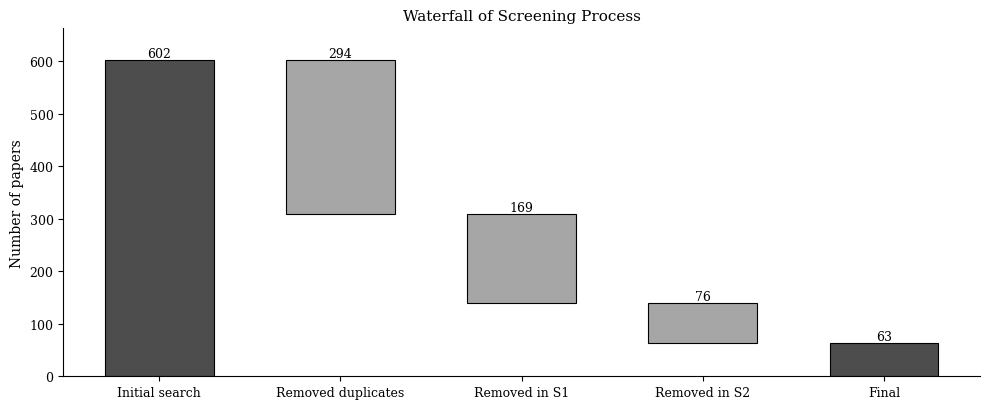

In [3042]:
import matplotlib.pyplot as plt
import numpy as np

# --- counts from your data ---
n_initial_search = len(initial_search_df)
n_duplicates = n_initial_search - len(removed_duplicates_df)
n_removed_s1 = len(removed_duplicates_df) - len(after_s1_df)
n_removed_s2 = len(after_s1_df) - len(final_articles_df)
n_final = len(after_s1_df) - n_removed_s2

# --- waterfall data ---
labels  = ["Initial search", "Removed duplicates", "Removed in S1", "Removed in S2", "Final"]
values  = [n_initial_search, n_duplicates, n_removed_s1, n_removed_s2, n_final]

# beregn nivået etter hvert steg (alt trekkes fra)
levels = [n_initial_search]
for v in values[1:]:
    levels.append(levels[-1] - v)

# --- stil for akademisk presentasjon ---
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 10,
    "axes.titlesize": 11,
    "axes.labelsize": 10,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9
})

# --- plot ---
fig, ax = plt.subplots(figsize=(10, 4.2))
x = np.arange(len(labels))

# gråtoner i stedet for rødt
colors = [
    "#4d4d4d",  # initial
    "#a6a6a6",  # removed duplicates
    "#a6a6a6",  # removed in S1
    "#a6a6a6",  # removed in S2
    "#4d4d4d"   # final
]

# stolper
for i in range(len(labels)):
    if i == 0:
        ax.bar(x[i], values[i], color=colors[i], width=0.6, edgecolor="black", linewidth=0.8)
    else:
        ax.bar(x[i], values[i], bottom=levels[i-1]-values[i], color=colors[i], width=0.6, edgecolor="black", linewidth=0.8)
    # tekst
    ax.text(x[i], levels[i-1] if i > 0 else values[i],
            f"{int(values[i]):,}",
            ha="center", va="bottom", fontsize=9)

# --- akseoppsett ---
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_ylabel("Number of papers")
ax.set_title("Waterfall of Screening Process")
ax.set_ylim(0, n_initial_search * 1.1)
ax.grid(False)

# fjern topp og høyre ramme
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# stram layout
plt.tight_layout()
plt.show()

### 2.2 Articles per Database Chart

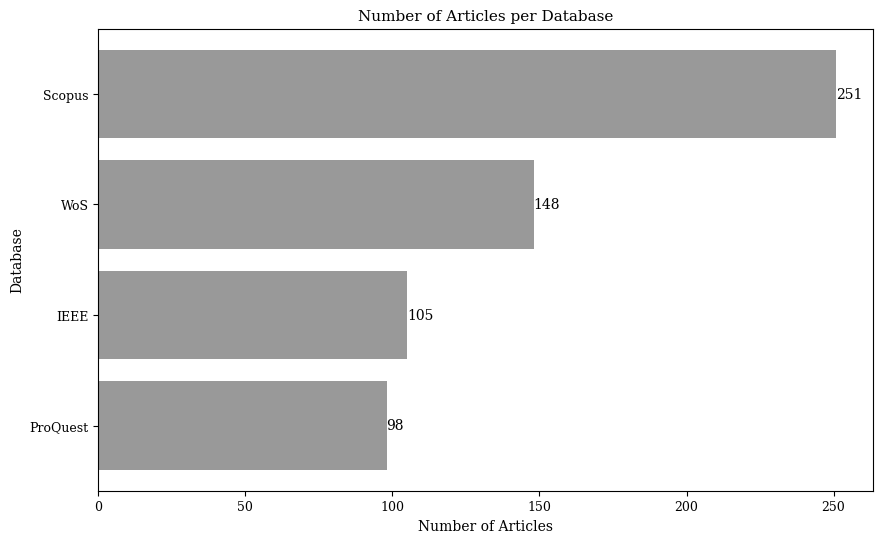

In [3043]:
# Bar chart of total sample size of articles per database before cleaning and screening

import matplotlib.pyplot as plt

wos_results_before_screening = len(clean_wos_df)
scopus_results_before_screening = len(clean_scopus_df)
ieee_results_before_screening = len(clean_ieee_df)
proquest_results_before_screening = len(clean_proquest_df)

# Data for the chart
databases = ['ProQuest', 'IEEE', 'WoS', 'Scopus']
results = [proquest_results_before_screening, ieee_results_before_screening, wos_results_before_screening, scopus_results_before_screening]
colors = ['#999999', '#999999', '#999999', '#999999']

# Create the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(databases, results, color=colors)

# Add numbers on top of the bars
for bar in bars:
  width = bar.get_width()
  plt.text(width, bar.get_y() + bar.get_height()/2, str(int(width)), ha='left', va='center')

# Add labels and title
plt.xlabel('Number of Articles')
plt.ylabel('Database')
plt.title('Number of Articles per Database')

# Show the chart
plt.show()

### 2.3 Publication Trends by Year Chart

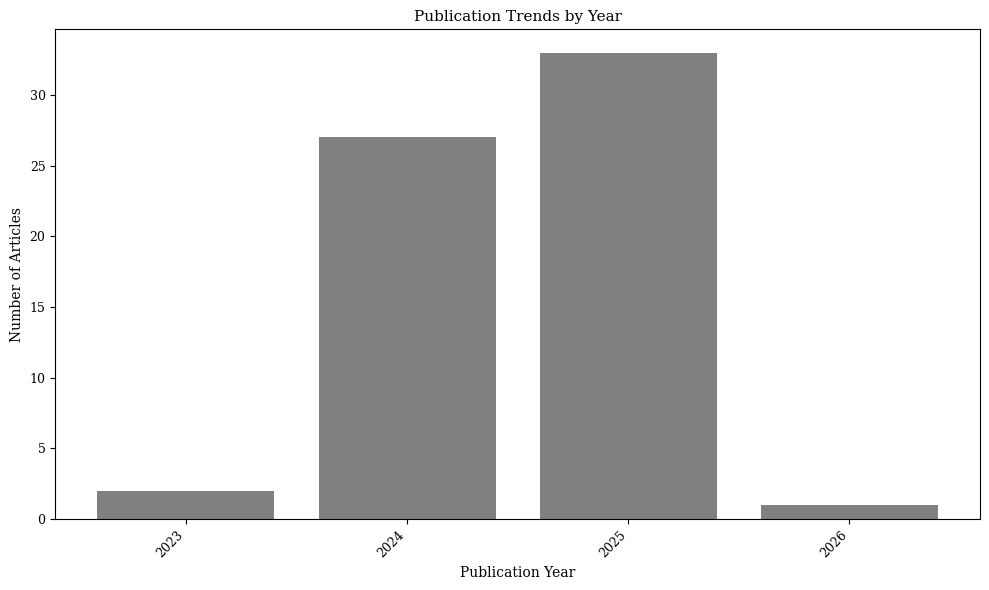

In [3044]:
# Get the publication year counts
publication_years = merged_df['Publication Year'].value_counts().sort_index()

# Get the list of years with publications and their counts
years_with_publications = publication_years.index.tolist()
counts = publication_years.values.tolist()

# Initialize lists for positions and labels
positions = []
x_labels = []
current_position = 0
gap_positions = []

# Loop through the years to handle missing years
gap_size = 0.1
for i, year in enumerate(years_with_publications):
    if i > 0:
        gap = year - years_with_publications[i - 1]
        if gap > 1:
            # Insert a small gap for gaps greater than 1 year
            current_position += gap_size
            gap_positions.append(current_position)  # Record the gap position
            current_position += gap_size

    # Add the current year
    positions.append(current_position)
    x_labels.append(str(int(year)))
    current_position += 1  # Increment position for the next bar

# Create the bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, counts, color='gray', width=0.8)

# Set the x-ticks to match the positions and labels
ax.set_xticks(positions)
ax.set_xticklabels(x_labels, rotation=45, ha='right')

# Draw '//' at the gap positions
for gap_pos in gap_positions:
    # Coordinates for the '//' symbol
    y = -max(counts) * 0.02  # Slightly below the x-axis
    dy = max(counts) * 0.04  # Length of the slashes

    # Draw two slashes to represent the '//' symbol
    ax.plot([gap_pos - 0.5 - gap_size, gap_pos - 0.5], [y, y + dy], color='black', clip_on=False, linewidth=1)
    ax.plot([gap_pos - 0.5, gap_pos - 0.5 + gap_size], [y, y + dy], color='black', clip_on=False, linewidth=1)

# Add labels and title
ax.set_xlabel('Publication Year')
ax.set_ylabel('Number of Articles')
ax.set_title('Publication Trends by Year')

# Force y axis to start at 0
ax.set_ylim(bottom=0)

# Adjust layout to prevent clipping of tick-labels
plt.tight_layout()
plt.show()

### 2.4 Functional Roles of LLM Distribution Chart

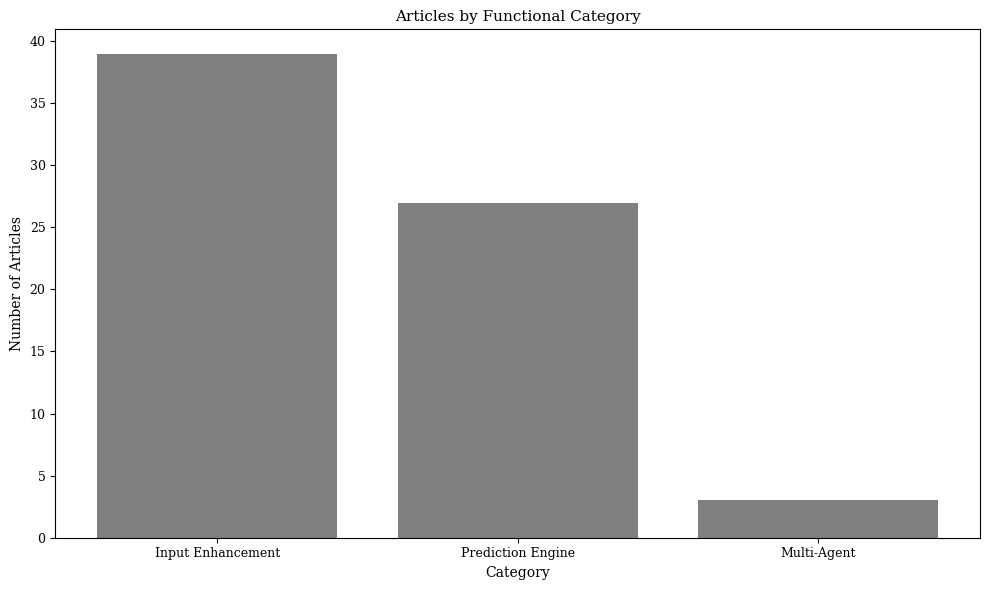

In [3045]:
import matplotlib.pyplot as plt

final_articles_df = notion_df[notion_df["Include?"] == "Yes"]

# Kolonnenavn fra Notion / df
cols = ["Input enhancement?", "Prediction engine?", "Multi-agent?"]
labels = ["Input Enhancement", "Prediction Engine", "Multi-Agent"]

# Tell antall artikler med ✔️ i hver kolonne
counts = [(final_articles_df[c] == "✔️").sum() for c in cols]

# Lag søylediagram (samme stil og farger som originalgrafen)
fig, ax = plt.subplots(figsize=(10, 6))
positions = list(range(len(labels)))

ax.bar(positions, counts, color='gray', width=0.8)

# Akser og titler
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')
ax.set_title('Articles by Functional Category')

# Start y-aksen på 0
ax.set_ylim(bottom=0)

# Stram layout og vis
plt.tight_layout()
plt.show()


### 2.5 Sentiment Type Distribution Chart

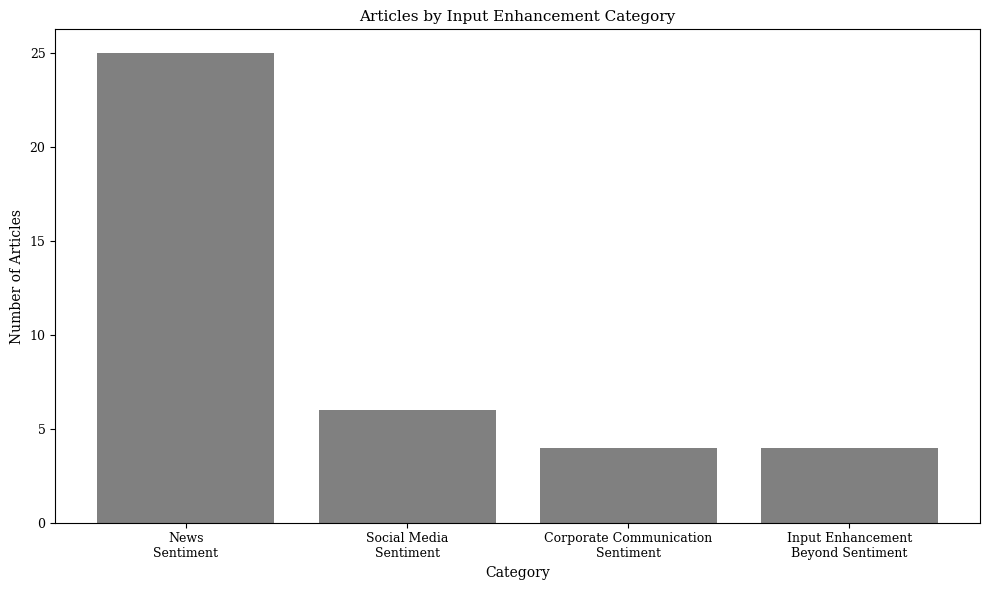

In [3046]:
import matplotlib.pyplot as plt

# Kolonnenavn fra Notion / df
cols = ["News Sentiment", "Social Media Sentiment", "Corporate Communication Sentiment", "Input Enhancement Beyond Sentiment"]
labels = ["News\nSentiment", "Social Media\nSentiment", "Corporate Communication\nSentiment", "Input Enhancement\nBeyond Sentiment"]

# Tell antall artikler med ✔️ i hver kolonne
counts = [(final_articles_df[c] == True).sum() for c in cols]

# Lag søylediagram (samme stil og farger som originalgrafen)
fig, ax = plt.subplots(figsize=(10, 6))
positions = list(range(len(labels)))

ax.bar(positions, counts, color='gray', width=0.8)

# Akser og titler
ax.set_xticks(positions)
ax.set_xticklabels(labels, rotation=0, ha='center')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Articles')
ax.set_title('Articles by Input Enhancement Category')

# Start y-aksen på 0
ax.set_ylim(bottom=0)

# Stram layout og vis
plt.tight_layout()
plt.show()

### 2.6 Prediction Engine Distribution Chart

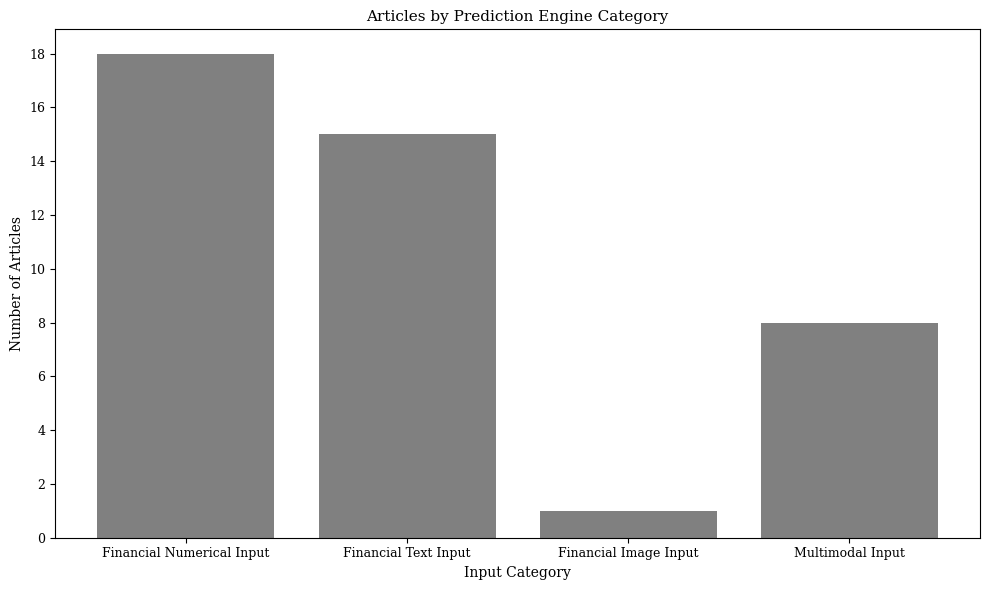

In [3047]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator


# Tillatte kategorier (som i bildet)
allowed = {
    "Financial Numerical Input",
    "Financial Text Input",
    "Financial Image Input",
    "Multimodal Input",
}

# 1. Kolonnen
col = "Type Prediction Engine"

# 2. Split hver celle og behold kun allowed-kategoriene
all_values = []

for cell in final_articles_df[col].fillna(""):
    items = [v.strip() for v in cell.split(",") if v.strip() != ""]
    filtered = [v for v in items if v in allowed]
    all_values.extend(filtered)

# 3. Tell
counts = Counter(all_values)

# 4. Klargjør data (behold rekkefølge som i bildet)
labels = [
    "Financial Numerical Input",
    "Financial Text Input",
    "Financial Image Input",
    "Multimodal Input",
]

values = [counts[label] for label in labels]
positions = range(len(labels))

# 5. Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, values, color="gray", width=0.8)

ax.set_xticks(list(positions))
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.set_xlabel("Input Category")
ax.set_ylabel("Number of Articles")
ax.set_title("Articles by Prediction Engine Category")
ax.set_ylim(bottom=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))


plt.tight_layout()
plt.show()

### 2.7 Articles by Asset Class Overview

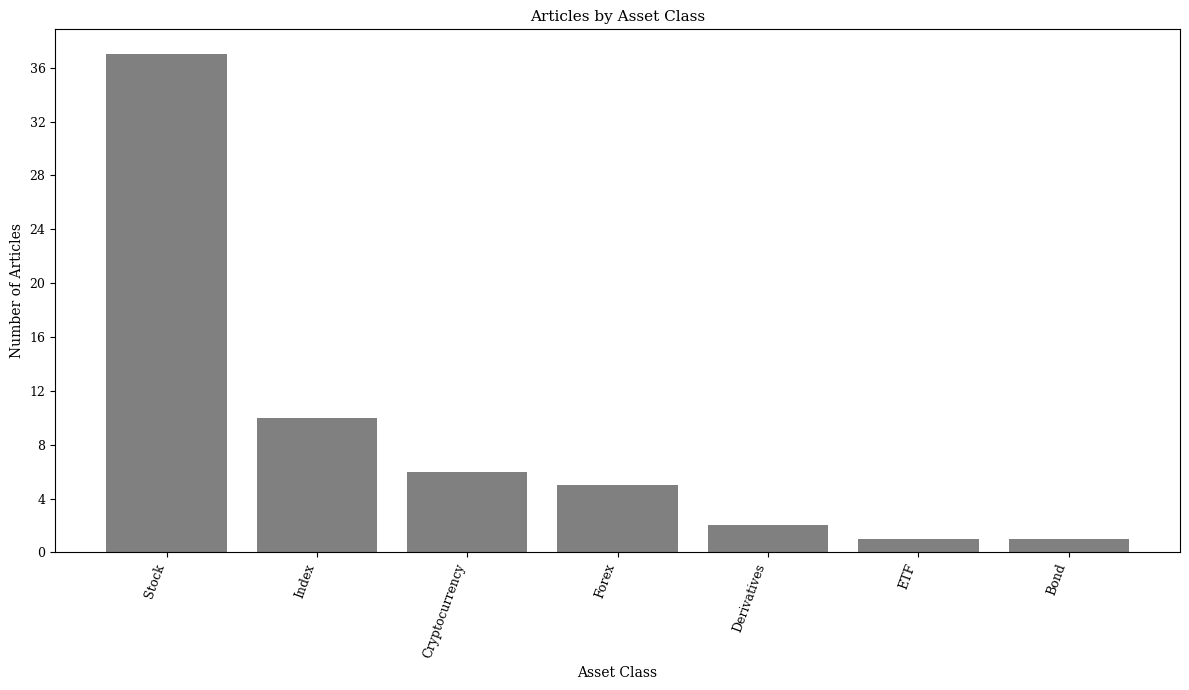

In [3048]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

# Allowed asset classes
allowed = {
    "Stock",
    "Cryptocurrency",
    "Index",
    "ETF",
    "Derivatives",
    "Bond",
    "Forex",
}

# Column to analyze
col = "Financial Instrument"

# Parse & filter
all_values = []

for cell in final_articles_df[col].fillna(""):
    # split by comma if multiple values exist
    items = [v.strip() for v in cell.split(",") if v.strip()]
    filtered = [v for v in items if v in allowed]
    all_values.extend(filtered)

# Count occurrences
counts = Counter(all_values)

# Sort labels by descending count
sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
sorted_labels = [item[0] for item in sorted_items]
sorted_values = [item[1] for item in sorted_items]

# Plot
fig, ax = plt.subplots(figsize=(12, 7))
ax.bar(range(len(sorted_labels)), sorted_values, color="gray", width=0.8)

ax.set_xticks(range(len(sorted_labels)))
ax.set_xticklabels(sorted_labels, rotation=70, ha="right")
ax.set_xlabel("Asset Class")
ax.set_ylabel("Number of Articles")
ax.set_title("Articles by Asset Class")
ax.set_ylim(bottom=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()



### 2.8 Model Family Overview

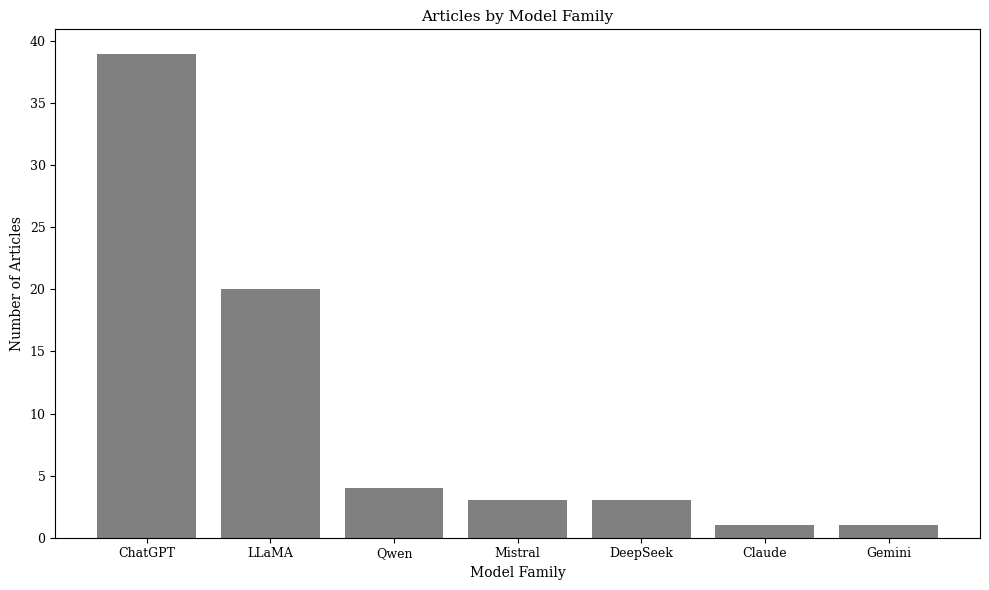

In [3049]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

col = "Model(s)"

families = {
    "ChatGPT": ["gpt-2", "gpt-3", "gpt-4", "gpt-4o", "gpt-4o-mini", "gpt-3.5-turbo", "gpt-3.5", "open ai", "chatgpt", "gpt-4 turbo"],
    "LLaMA": ["open llama 13b", "llama", "llama 3", "lag-llama", "con-llama", "llama 2", "llama-3.1", "llama 3.1 8b", "llama 7b", "llama 3.3 70b", "vicuna"],
    "DeepSeek": ["deepseek", "deepseek r1 7b", "deepseek-v3"],
    "Gemini": ["gemini advanced", "gemini-1.0"],
    "Qwen": ["qwen", "qwen 3", "qwen-2-7b"], 
    "Mistral": ["mistral-7b", "mistral 0.3"],
    "Claude": ["claude", "claude-3.5"],
}

counts = Counter()

# Count mentions by family
for cell in final_articles_df[col].fillna(""):
    text = str(cell).lower()
    for label, keywords in families.items():
        if any(k in text for k in keywords):
            counts[label] += 1

sorted_items = sorted(counts.items(), key=lambda x: x[1], reverse=True)
labels = [item[0] for item in sorted_items]
values = [item[1] for item in sorted_items]
positions = range(len(labels))

# ---- Plot ----
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(positions, values, color="gray", width=0.8)

ax.set_xticks(list(positions))
ax.set_xticklabels(labels, rotation=0, ha="center")
ax.set_xlabel("Model Family")
ax.set_ylabel("Number of Articles")
ax.set_title("Articles by Model Family")

ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.set_ylim(bottom=0)

plt.tight_layout()
plt.show()


### 2.9 Author Analysis

In [3050]:
from IPython.display import HTML
import pandas as pd

cols = ["Author faculty 1", "Author faculty 2", "Author faculty 3"]

# Collect unique, cleaned values
unique_values = (
    pd.concat([author_df[col] for col in cols])
      .dropna()
      .astype(str)
      .str.strip()
      .unique()
)

# Convert to HTML list
html_list = "<br>".join(sorted(unique_values))

# Display scrollable box
HTML(f"""
<div style="
    border:1px solid #ccc;
    padding:10px;
    width:500px;
    height:300px;
    overflow-y:scroll;
    font-family:monospace;
">
{html_list}
</div>
""")


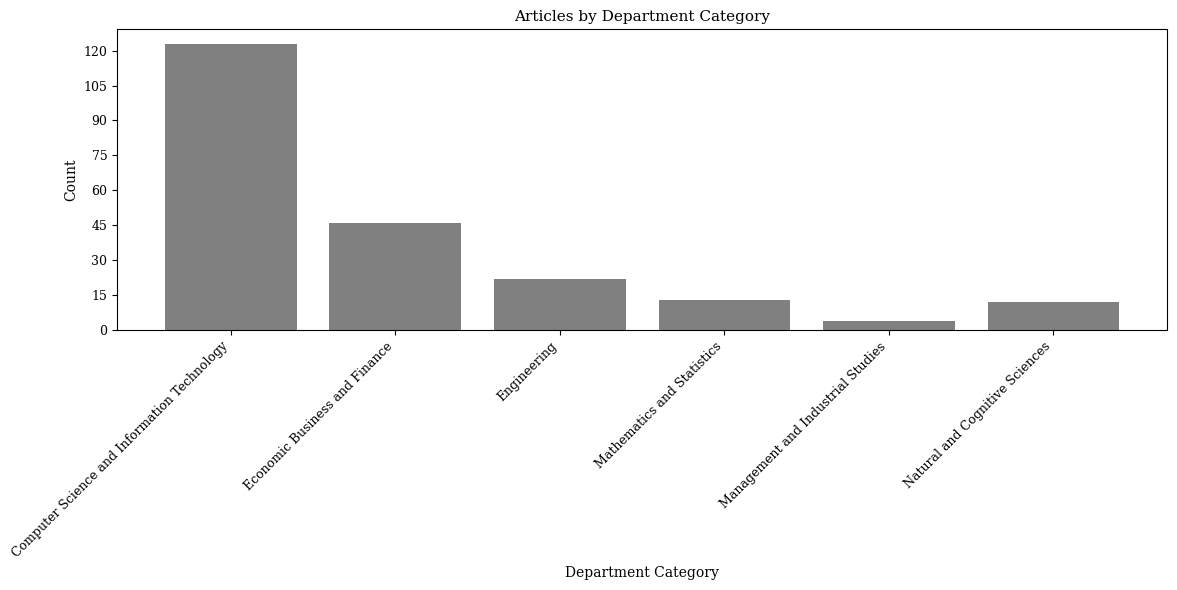

In [3051]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

# The three department-category columns
dept_cols = ["Department Category 1", "Department Category 2", "Department Category 3"]

# The department categories you are using
categories = [
    "Computer Science and Information Technology",
    "Economic Business and Finance",
    "Engineering",
    "Mathematics and Statistics",
    "Management and Industrial Studies",
    "Natural and Cognitive Sciences",
]

# Count occurrences across all three columns
dept_counts = Counter()

for col in dept_cols:
    for value in author_df[col]:
        value = str(value).strip()
        dept_counts[value] += 1

# Prepare data for plotting
labels = categories
values = [dept_counts[label] for label in labels]
positions = range(len(labels))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(positions, values, color="gray", width=0.8)

ax.set_xticks(list(positions))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_xlabel("Department Category")
ax.set_ylabel("Count")
ax.set_title("Articles by Department Category")
ax.set_ylim(bottom=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [3052]:
faculty_mapping = {

    # -------------------------------------------------------
    # Computer Science and Information Technology
    # -------------------------------------------------------
    "Advanced Institute of Convergence Technology": "Computer Science and Information Technology",
    "College of Computer Science": "Computer Science and Information Technology",
    "College of Computer Science and Technology": "Computer Science and Information Technology",
    "College of Software": "Computer Science and Information Technology",
    "College of Technological Innovation": "Computer Science and Information Technology",
    "College of Technological Innovations": "Computer Science and Information Technology",
    "Computer Department": "Computer Science and Information Technology",
    "Department of Applied Artificial Intelligence/Department of Human-Artificial Intelligence Interaction": "Computer Science and Information Technology",
    "Department of Artificial Intelligence Engineering": "Computer Science and Information Technology",
    "Department of Computer Engineering": "Computer Science and Information Technology",
    "Department of Computer Science": "Computer Science and Information Technology",
    "Department of Computer Science and Engineering": "Computer Science and Information Technology",
    "Department of Computer Science and Mathematics": "Computer Science and Information Technology",
    "Department of Computer Science and Technology": "Computer Science and Information Technology",
    "Department of Computing": "Computer Science and Information Technology",
    "Department of Computing & Mathematics": "Computer Science and Information Technology",
    "Department of Digital Systems": "Computer Science and Information Technology",
    "Department of Informatics Engineering": "Computer Science and Information Technology",
    "Department of Information and Communication Engineering": "Computer Science and Information Technology",
    "Department of Interaction Science/Department of Human-AI Interaction": "Computer Science and Information Technology",
    "Department of Systems Innovations": "Computer Science and Information Technology",
    "Faculty of Computers and Information": "Computer Science and Information Technology",
    "Faculty of Computing and Data Sciences": "Computer Science and Information Technology",
    "Faculty of Computing and Informatics": "Computer Science and Information Technology",
    "Faculty of Information and Human Sciences": "Computer Science and Information Technology",
    "Graduate School of Information Science": "Computer Science and Information Technology",
    "Graduate School of Information Science and Technology": "Computer Science and Information Technology",
    "Information and Human Sciences": "Computer Science and Information Technology",
    "Institute of Data and Information": "Computer Science and Information Technology",
    "Jheronimus Academy of Data Science": "Computer Science and Information Technology",
    "Key Laboratory of Symbolic Computation and Knowledge Engineering of Ministry of Education": "Computer Science and Information Technology",
    "Khoury College of Computer Sciences": "Computer Science and Information Technology",
    "Laboratory of Robotics and Intelligent Manufacturing Equipment Technology": "Computer Science and Information Technology",
    "Professor of Artificial Intelligence": "Computer Science and Information Technology",
    "School of Computer Science": "Computer Science and Information Technology",
    "School of Computer Science and Engineering": "Computer Science and Information Technology",
    "School of Computer Science and Technology": "Computer Science and Information Technology",
    "School of Computer and Control Engineering": "Computer Science and Information Technology",
    "School of Computing": "Computer Science and Information Technology",
    "School of Computing and Digital Technologies": "Computer Science and Information Technology",
    "School of Computing and Information Systems": "Computer Science and Information Technology",
    "School of Cyberspace Security": "Computer Science and Information Technology",
    "School of Information": "Computer Science and Information Technology",
    "School of Information Science and Technology": "Computer Science and Information Technology",
    "School of Software": "Computer Science and Information Technology",

    # -------------------------------------------------------
    # Economics, Business, and Finance
    # -------------------------------------------------------
    "Bucharest University of Economic Studies": "Economics, Business, and Finance",
    "Department of Business Organization and Finance": "Economics, Business, and Finance",
    "Department of Economic Informatics and Cybernetics": "Economics, Business, and Finance",
    "Department of Economics and Finance": "Economics, Business, and Finance",
    "Depertment of Economics and Finance": "Economics, Business, and Finance",
    "Department of Information Management and Finance": "Economics, Business, and Finance",
    "Doctoral School of Economic Sciences": "Economics, Business, and Finance",
    "Faculty of Business and Economics": "Economics, Business, and Finance",
    "Faculty of Economic Cybernetics, Statistics and Computer Science": "Economics, Business, and Finance",
    "Faculty of Economics and Business": "Economics, Business, and Finance",
    "Faculty of Management and Economics": "Economics, Business, and Finance",
    "Institute for Economic Forecasting": "Economics, Business, and Finance",
    "School of Business": "Economics, Business, and Finance",
    "School of Business and Economics": "Economics, Business, and Finance",
    "School of Economic and Business": "Economics, Business, and Finance",
    "School of Economics": "Economics, Business, and Finance",
    "School of Economics and Management": "Economics, Business, and Finance",
    "School of Economics and Political Science": "Economics, Business, and Finance",

    # -------------------------------------------------------
    # Engineering
    # -------------------------------------------------------
    "College of Engineering and Computer Science": "Engineering",
    "College of Engineering, Design and Computing": "Engineering",
    "Department of Electrical Engineering": "Engineering",
    "Department of Electrical and Computer Engineering": "Engineering",
    "Department of Industrial and Systems Engineering": "Engineering",
    "Engineering Design": "Computer Science and Information Technology",
    "Faculty of Electronic and Information Engineering": "Computer Science and Information Technology",
    "Faculty of Transport and Traffic Sciences": "Engineering",
    "School of Engineering": "Engineering",
    "Engineering Design": "Engineering",

    # -------------------------------------------------------
    # Mathematics and Statistics
    # -------------------------------------------------------
    "Academy of Mathematics and Systems Science": "Mathematics and Statistics",
    "Centre for Mathematical Sciences": "Mathematics and Statistics",
    "Columbia University, Department of Mathematics": "Mathematics and Statistics",
    "Department of Statistics and Econometrics": "Mathematics and Statistics",
    "Department of Statistics and Econometrics, Bucharest University of Economic Studies": "Mathematics and Statistics",
    "School of Mathematics Statistics and Mechanics": "Mathematics and Statistics",

    # -------------------------------------------------------
    # Management and Industrial Studies
    # -------------------------------------------------------
    "Decision, Risk, and Operations": "Management and Industrial Studies",
    "Department of Information and Decision Sciences": "Management and Industrial Studies",
    "Faculty of Social Sciences": "Management and Industrial Studies",
    "School of Law": "Management and Industrial Studies",

    # -------------------------------------------------------
    # Natural and Cognitive Sciences
    # -------------------------------------------------------
    "Academy of Pharmacy": "Natural and Cognitive Sciences",
    "Department of Library Science": "Natural and Cognitive Sciences",
    "Institute of Population Health": "Natural and Cognitive Sciences",
    "Fundamental and Applied Science Department": "Natural and Cognitive Sciences",

    # -------------------------------------------------------
    # None (non-academic / cannot classify)
    # -------------------------------------------------------
    "AI for Alpha": "None",
    "AI for Alpha and CentraleSupelec": "None",
    "Amazon": "None",
    "CardoAI": "None",
    "College of Interdisciplinary Science and Technology": "None",
    "Express Mobility Partners": "None",
    "Head of Data & AI,": "None",
    "Hellenic Telecommunications Organisation S.A": "None",
    "Hewlett Packard Enterprise": "None",
    "Independent Researcher": "None",
    "Innov-Acts Limited": "None",
    "Meta": "None",
    "NLP Research Centre": "None",
    "Nomura Holdings": "None",
    "Systematic Equities Team RAM Active Investments": "None",
    "Unknown": "None"
}

# Ensure the columns exist
dept_cols = ["Department Category 1", "Department Category 2", "Department Category 3"]
faculty_cols = ["Author faculty 1", "Author faculty 2", "Author faculty 3"]

def map_faculty_to_category(value):
    if pd.isna(value):
        return value  # keep NaN
    value = str(value).strip()
    return faculty_mapping.get(value, "None")

# Apply mapping
for fac_col, dept_col in zip(faculty_cols, dept_cols):
    author_df[dept_col] = author_df[fac_col].apply(map_faculty_to_category)

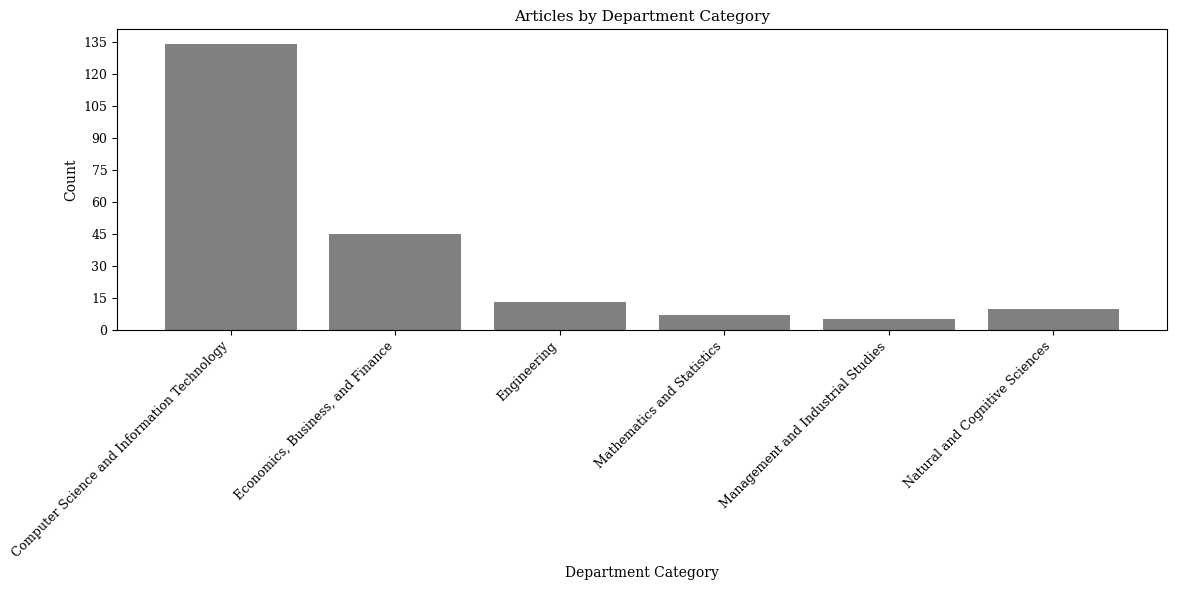

In [3053]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

# Columns to fix
dept_cols = ["Department Category 1", "Department Category 2", "Department Category 3"]

# Incorrect → correct mapping
fix_from = "Economic Business and Finance"
fix_to   = "Economics, Business, and Finance"

# Apply the replacement across all three columns
for col in dept_cols:
    author_df[col] = author_df[col].replace(fix_from, fix_to)

# The three department-category columns
dept_cols = ["Department Category 1", "Department Category 2", "Department Category 3"]

# The department categories you are using
categories = [
    "Computer Science and Information Technology",
    "Economics, Business, and Finance",
    "Engineering",
    "Mathematics and Statistics",
    "Management and Industrial Studies",
    "Natural and Cognitive Sciences",
]

# Count occurrences across all three columns
dept_counts = Counter()

for col in dept_cols:
    for value in author_df[col]:
        value = str(value).strip()
        dept_counts[value] += 1

# Prepare data for plotting
labels = categories
values = [dept_counts[label] for label in labels]
positions = range(len(labels))

# Create the bar plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.bar(positions, values, color="gray", width=0.8)

ax.set_xticks(list(positions))
ax.set_xticklabels(labels, rotation=45, ha="right")
ax.set_xlabel("Department Category")
ax.set_ylabel("Count")
ax.set_title("Articles by Department Category")
ax.set_ylim(bottom=0)

ax.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

### 2.10 Journal Categorization

In [3054]:
from IPython.display import HTML

HTML(
    merged_df['Source Title']
        .value_counts()
        .to_frame()
        .to_html()
        .replace('<table', '<table style="display:block; height:300px; overflow-y:scroll"')
)

,count
Source Title,
2024 IEEE International Conference on Big Data (BigData),3
"Proceedings of the International Conference on Soft Computing and Machine Intelligence, ISCMI",2
"IEEE International Conference on Data Mining Workshops, ICDMW",2
"5TH ACM INTERNATIONAL CONFERENCE ON AI IN FINANCE, ICAIF 2024",2
Finance Research Letters,2
Lecture Notes in Networks and Systems,2
2024 International Conference on Computer and Applications (ICCA),2
Journal of Theoretical and Applied Information Technology,1
International Conference on Agents and Artificial Intelligence,1


In [3055]:
# ----- 1. Mapping dictionary -----
journal_map = {
    "2024 IEEE International Conference on Big Data (BigData)": "Computer Science and Information Technology",
    "Proceedings of the International Conference on Soft Computing and Machine Intelligence, ISCMI": "Computer Science and Information Technology",
    "IEEE International Conference on Data Mining Workshops, ICDMW": "Computer Science and Information Technology",
    "5TH ACM INTERNATIONAL CONFERENCE ON AI IN FINANCE, ICAIF 2024": "Economics, Business and Finance",
    "Finance Research Letters": "Economics, Business and Finance",
    "Lecture Notes in Networks and Systems": "Engineering",
    "2024 International Conference on Computer and Applications (ICCA)": "Computer Science and Information Technology",
    "Journal of Theoretical and Applied Information Technology": "Computer Science and Information Technology",
    "International Conference on Agents and Artificial Intelligence": "Computer Science and Information Technology",
    "2025 7th International Conference on Natural Language Processing (ICNLP)": "Computer Science and Information Technology",
    "Mathematics": "Mathematics and Statistics",
    "2024 15th International Conference on Information and Knowledge Technology (IKT)": "Computer Science and Information Technology",
    "CEUR Workshop Proceedings": "Computer Science and Information Technology",
    "PROCEEDINGS OF THE INTERNATIONAL CONFERENCE ON BUSINESS EXCELLENCE": "Management and Industrial Studies",
    "Proceedings of the Annual Meeting of the Association for Computational Linguistics": "Computer Science and Information Technology",
    "Advances in Artificial Intelligence and Machine Learning": "Computer Science and Information Technology",
    "2025 Joint International Conference on Automation-Intelligence-Safety (ICAIS) & International Symposium on Autonomous Systems (ISAS)": "Engineering",
    "Proceedings of SPIE - The International Society for Optical Engineering": "Engineering",
    "IEEE Transactions on Neural Networks and Learning Systems": "Computer Science and Information Technology",
    "Big Data and Cognitive Computing": "Computer Science and Information Technology",
    "2024 SICE FESTIVAL WITH ANNUAL CONFERENCE, SICE FES 2024": "Engineering",
    "2025 11th International Conference on Communication and Signal Processing (ICCSP)": "Engineering",
    "2025 IEEE 14th International Conference on Communication Systems and Network Technologies (CSNT)": "Engineering",
    "Lecture Notes of the Institute for Computer Sciences, Social-Informatics and Telecommunications Engineering, LNICST": "Computer Science and Information Technology",
    "Communications in Computer and Information Science": "Computer Science and Information Technology",
    "2025 International Conference on Advancement in Data Science, E-learning and Information System (ICADEIS)": "Computer Science and Information Technology",
    "2024 International Conference on Intelligent Cybernetics Technology & Applications (ICICyTA)": "Engineering",
    "Financial Innovation": "Economics, Business and Finance",
    "Journal of Behavioral Finance": "Economics, Business and Finance",
    "Expert Systems with Applications": "Computer Science and Information Technology",
    "2024 IEEE International Conference on Future Machine Learning and Data Science (FMLDS)": "Computer Science and Information Technology",
    "Journal of Financial Data Science": "Economics, Business and Finance",
    "Journal of Futures Markets": "Economics, Business and Finance",
    "Procedia Computer Science": "Computer Science and Information Technology",
    "2025 17th International Conference on Advanced Computational Intelligence (ICACI)": "Computer Science and Information Technology",
    "IFIP Advances in Information and Communication Technology": "Computer Science and Information Technology",
    "International Journal of Advanced Computer Science and Applications": "Computer Science and Information Technology",
    "2025 IEEE International Conference on eScience (eScience)": "Computer Science and Information Technology",
    "2024 CONFERENCE ON EMPIRICAL METHODS IN NATURAL LANGUAGE PROCESSING, EMNLP 2024": "Computer Science and Information Technology",
    "Neural Processing Letters": "Computer Science and Information Technology",
    "Intelligent Systems with Applications": "Computer Science and Information Technology",
    "2025 IEEE Conference on Artificial Intelligence (CAI)": "Computer Science and Information Technology",
    "International Journal of Computing and Digital Systems": "Computer Science and Information Technology",
    "2025 IEEE 11TH INTERNATIONAL CONFERENCE ON INTELLIGENT DATA AND SECURITY, IDS": "Computer Science and Information Technology",
    "Knowledge-Based Systems": "Computer Science and Information Technology",
    "PLOS ONE": "Natural and Cognitive Sciences",
    "Journal of Risk and Financial Management": "Economics, Business and Finance",
    "Computational Economics": "Economics, Business and Finance",
    "FINANCE RESEARCH LETTERS": "Economics, Business and Finance",
    "Journal of Intelligent Information Systems": "Computer Science and Information Technology",
    "MACHINE LEARNING WITH APPLICATIONS": "Computer Science and Information Technology"
}

# ----- 2. Add new column -----
merged_df["Journal Category"] = merged_df["Source Title"].map(journal_map)

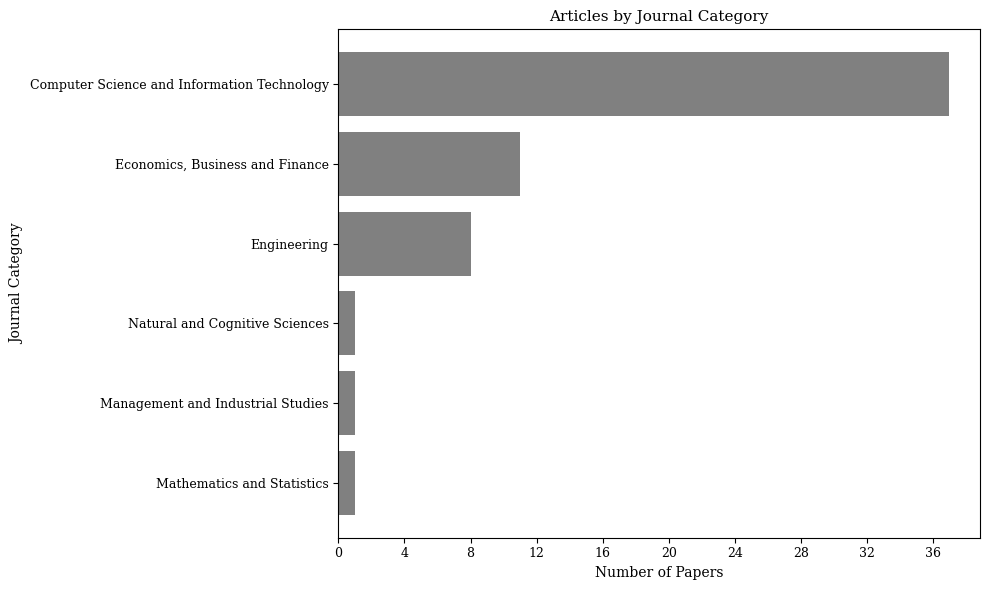

In [3056]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib.ticker import MaxNLocator

# Column containing journal category labels
col = "Journal Category"

# Count frequency of categories
counts = Counter()

for cell in merged_df[col].fillna(""):
    text = str(cell).strip()
    if text:
        counts[text] += 1

# Order categories consistently (same order as in your figure)
labels = [
    "Mathematics and Statistics",
    "Management and Industrial Studies",
    "Natural and Cognitive Sciences",
    "Engineering",
    "Economics, Business and Finance",
    "Computer Science and Information Technology",
]

# Values aligned with the label order
values = [counts[label] for label in labels]
positions = range(len(labels))

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(positions, values, color="gray")

ax.set_yticks(list(positions))
ax.set_yticklabels(labels)
ax.set_xlabel("Number of Papers")
ax.set_ylabel("Journal Category")
ax.set_title("Articles by Journal Category")
ax.xaxis.set_major_locator(MaxNLocator(integer=True))

plt.tight_layout()
plt.show()

In [3057]:
all_articles_df = pd.read_csv("all_articles.csv", sep=";")
filtered_df = all_articles_df[all_articles_df["Include?"].str.lower() == "yes"]
filtered_df
filtered_df.to_csv("all_articles2.csv")